100%|██████████| 100/100 [00:04<00:00, 20.97it/s]


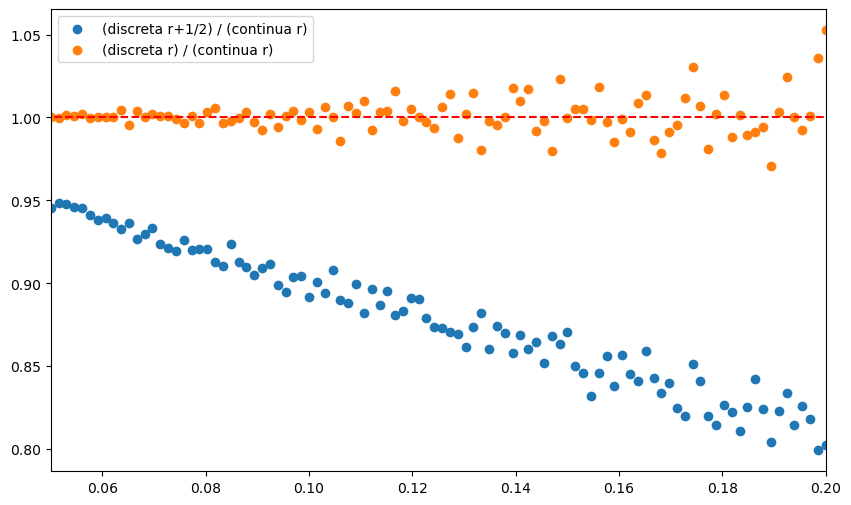

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import open3d as o3d
from tqdm import tqdm

def create_sphere(radius):
    """Create a 3D numpy array representing a sphere with the given radius."""
    grid_size = 2 * int(np.ceil(radius)) + 1
    grid = np.zeros((grid_size, grid_size, grid_size), dtype=np.int32)
    center = grid_size // 2
    for x in range(grid_size):
        for y in range(grid_size):
            for z in range(grid_size):
                if (x - center)**2 + (y - center)**2 + (z - center)**2 < radius**2:
                    grid[x, y, z] = 1
    return grid

def compare_spheres_fixed_radii(radii, voxel_sizes):
    results = []

    for r in radii:
        for voxel_size in tqdm(voxel_sizes):
            r_voxel = r / voxel_size
            r1 = r_voxel
            r2 = r_voxel + 0.5

            sphere1 = create_sphere(r1)
            sphere2 = create_sphere(r2)

            volume1 = np.sum(sphere1)
            volume2 = np.sum(sphere2)

            voxel_volume = voxel_size**3

            abs_diff = volume2 - volume1
            perc_diff = (abs_diff / volume1) * 100

            results.append({
                'radius': r,
                'voxel_size': voxel_size,
                'volume_r': volume1,
                'volume_r_plus_half': volume2,
                'absolute_difference': abs_diff,
                'percentage_difference': perc_diff,
                'ratio': volume2 / volume1,
                'v1_vs_continuous': volume1 * voxel_volume / (4/3 * np.pi * r**3),
                'v2_vs_continuous': volume2 * voxel_volume / (4/3 * np.pi * r**3)
            })

    df = pd.DataFrame(results)
    return df

# Definire i parametri
x_min = 0.025
x_max = 0.2
vdw_radii_1938: dict[str, float] = {"O": 1.4} # {"H": 1.2, "C": 1.7, "N": 1.5, "O": 1.4, "S": 1.85, "P": 1.9}
radii = list(vdw_radii_1938.values())
voxel_sizes = np.linspace(x_min, x_max, 100)

# Eseguire la comparazione
df_experiment = compare_spheres_fixed_radii(radii, voxel_sizes)

# Plot dei risultati
#colors = {1.2: 'r', 1.4: 'g', 1.6: 'b'}
plt.figure(figsize=(10, 6))

for r in [1.4]: #radii[:]:
    subset = df_experiment[df_experiment['radius'] == r].sort_values('voxel_size')
    plt.scatter(subset['voxel_size'], 1 / subset['v2_vs_continuous'], label=f'(discreta r+1/2) / (continua r)') #, color=colors[r])
    plt.scatter(subset['voxel_size'], 1 / subset['v1_vs_continuous'], label=f'(discreta r) / (continua r)') #, color=colors[r])
    plt.plot([-100, 100], [1, 1], 'r--')

plt.xlim(x_min, x_max)

# plt.xlabel('Voxel Size')
# plt.ylabel('Percentage Difference')
# plt.title('Percentage Difference between Volumes of Spheres for Different Voxel Sizes')
plt.legend()
plt.show()
